# Stock Time Series Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fetch yahoo data
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02,3.95,3.95,3.98,3.84,3.85,20548400
2014-01-03,4.00,4.00,4.00,3.88,3.98,22887200
2014-01-06,4.13,4.13,4.18,3.99,4.01,42398300
2014-01-07,4.18,4.18,4.25,4.11,4.19,42932100
2014-01-08,4.18,4.18,4.26,4.14,4.23,30678700


In [3]:
dataset.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02,3.95,3.95,3.98,3.84,3.85,20548400
2014-01-03,4.00,4.00,4.00,3.88,3.98,22887200
2014-01-06,4.13,4.13,4.18,3.99,4.01,42398300
2014-01-07,4.18,4.18,4.25,4.11,4.19,42932100
2014-01-08,4.18,4.18,4.26,4.14,4.23,30678700


In [4]:
dataset.tail()


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-08-20,19.980000,19.980000,20.08,19.350000,19.790001,62983200
2018-08-21,20.400000,20.400000,20.42,19.860001,19.980000,55629000
2018-08-22,20.900000,20.900000,20.92,20.209999,20.280001,62002700
2018-08-23,22.290001,22.290001,22.32,21.139999,21.190001,113444100
2018-08-24,23.980000,23.980000,24.00,22.670000,22.910000,164328200


In [5]:
len(dataset['Adj Close'].loc[:'2018-01-01'])

1007

In [6]:
weekly_Monday = dataset.asfreq('W-Mon')


In [7]:
weekly_Monday

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-06,4.130000,4.130000,4.180000,3.990000,4.010000,42398300.0
2014-01-13,4.130000,4.130000,4.200000,4.090000,4.190000,22856100.0
2014-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-27,3.410000,3.410000,3.490000,3.350000,3.480000,31332300.0
2014-02-03,3.330000,3.330000,3.440000,3.330000,3.430000,22280200.0
2014-02-10,3.630000,3.630000,3.640000,3.450000,3.500000,21241100.0
2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-24,3.710000,3.710000,3.730000,3.700000,3.710000,10717900.0
2014-03-03,3.670000,3.670000,3.700000,3.600000,3.660000,19555800.0


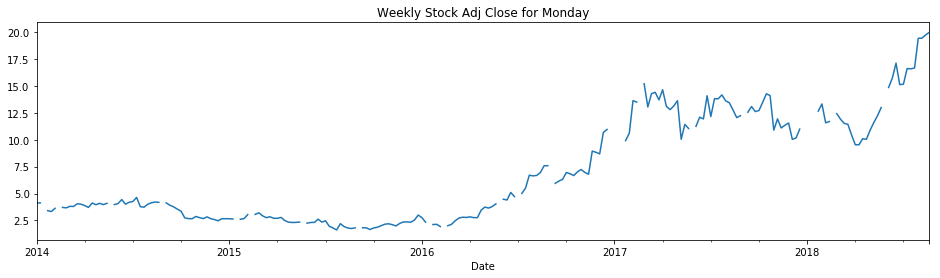

In [8]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_Monday['Adj Close'].plot(title='Weekly Stock Adj Close for Monday', ax=ax)

In [9]:
weekly_avg = dataset.resample('W').mean()

In [10]:
weekly_avg

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-05,3.9750,3.9750,3.990000,3.8600,3.9150,21717800
2014-01-12,4.1500,4.1500,4.224000,4.0720,4.1440,33503500
2014-01-19,4.2920,4.2920,4.392000,4.1940,4.2640,44944460
2014-01-26,3.7325,3.7325,3.862500,3.6950,3.8425,55743225
2014-02-02,3.4680,3.4680,3.522000,3.4180,3.4780,22354740
2014-02-09,3.3780,3.3780,3.440000,3.3320,3.3840,19802540
2014-02-16,3.6820,3.6820,3.710000,3.6020,3.6420,19903400
2014-02-23,3.7000,3.7000,3.740000,3.6625,3.7050,13253775
2014-03-02,3.7040,3.7040,3.746000,3.6740,3.7120,13192860


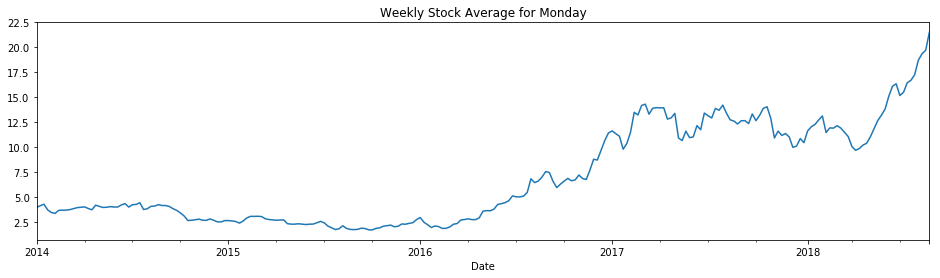

In [11]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_avg['Adj Close'].plot(title='Weekly Stock Average for Monday', ax=ax)

In [12]:
weekly_first = dataset.resample('W').first()

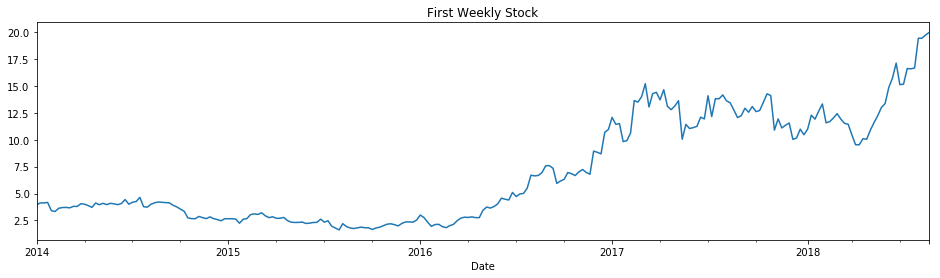

In [13]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_first['Adj Close'].plot(title='First Weekly Stock', ax=ax)

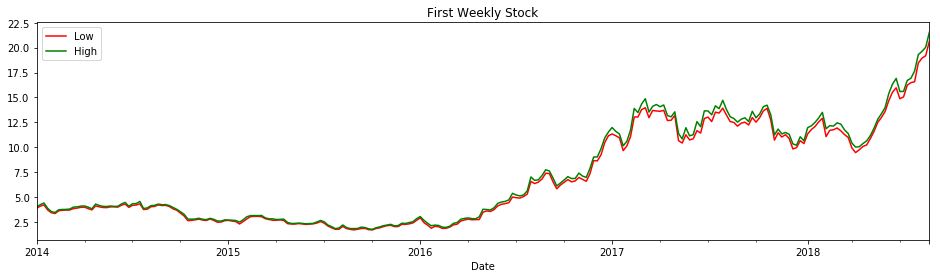

In [20]:
fig, ax = plt.subplots(figsize=(16, 4))
(dataset.groupby(pd.Grouper(freq='W'))[['Low','High']]).mean().plot(color=['Red', 'Green'], ax=ax, title='First Weekly Stock')

In [15]:
business_monthly = dataset.resample('BM')

Date
2014-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-05-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-08-29    AxesSubplot(0.125,0.2;0.775x0.68)
2014-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-11-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-27    AxesSubplot(0.125,0.2;0.775x0.68)
2015-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-05-29    AxesSubplot(0.125,0.2;0.775x0.68)
2015-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-09-30    AxesSubplot(0.125,0.2

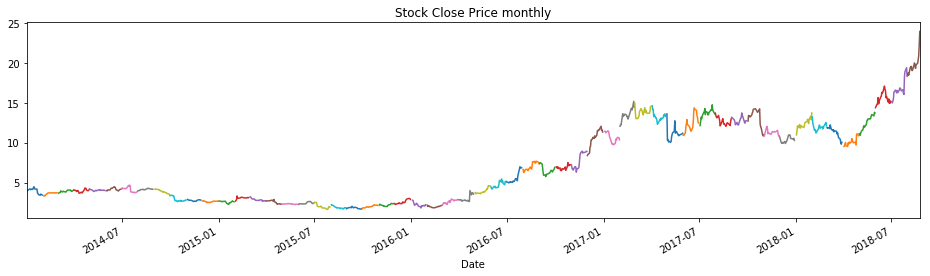

In [16]:
fig, ax = plt.subplots(figsize=(16, 4))
business_monthly['Adj Close'].plot(title='Stock Close Price monthly', ax=ax)

In [17]:
business_monthly['Adj Close'].plot(title='Stock Close Price monthly', ax=ax)

Date
2014-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-05-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-08-29    AxesSubplot(0.125,0.2;0.775x0.68)
2014-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-11-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-27    AxesSubplot(0.125,0.2;0.775x0.68)
2015-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-05-29    AxesSubplot(0.125,0.2;0.775x0.68)
2015-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-09-30    AxesSubplot(0.125,0.2